**Сбербанк, Работа с данными на Python. Толстиков Валентин**

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_image(img, title=None):
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    cv.waitKey(1)

## Задание № 1. Считаем круги

* Посчитать количество кругов на картинке с помощью OpenCV

In [3]:
file_image = './data/images/bubbles_2.jpg'
image = cv.imread(file_image)
show_image(image)

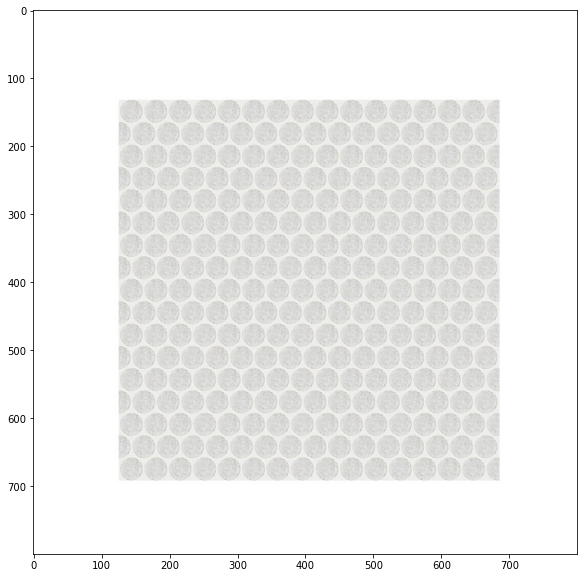

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB));

In [5]:
gray_image =  cv.cvtColor(image, cv.COLOR_BGR2GRAY)
out_image = image.copy()

circles = cv.HoughCircles(gray_image, cv.HOUGH_GRADIENT,
                          dp=1,
                          minDist=30,
                          param1=120,
                          param2=10,
                          minRadius=10,
                          maxRadius=20
                         )

circles = np.uint16(np.around(circles[0, :]))
print('detected: {} circles'.format(len(circles)))
for i in circles:
    cv.circle(out_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv.circle(out_image, (i[0], i[1]), 2, (0, 0, 255), 3)
cv.putText(out_image, 'detected: {} circles'.format(len(circles)), (245, 100),
           cv.FONT_HERSHEY_SIMPLEX,  1, (0, 0, 0), 2)
show_image(out_image, 'detected circles')

detected: 272 circles


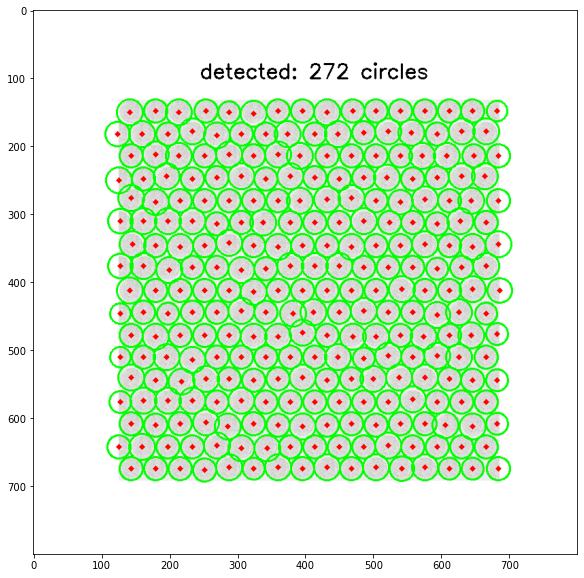

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(out_image, cv.COLOR_BGR2RGB));

## Задание № 2. Развешиваем картины

* Выделить все картины на фотографии
* Посчитать площадь картин. 
* Подписать площадь каждой картины на фотографии

In [7]:
file_image = './data/images/pictures_2.jpg'
image = cv.imread(file_image)
show_image(image)

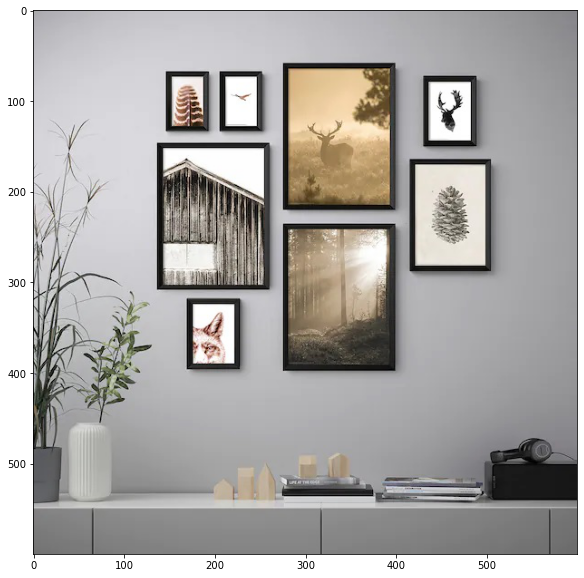

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB));

In [9]:
# Код для подбора параметров цветового фильтра, взято с
# https://bloglinux.ru/4137-python-mashinnoe-zrenie-opencv-chast-1.html

file_image = './data/images/pictures_2.jpg'
image = cv.imread(file_image)

def nothing(*arg):
    pass

cv.namedWindow("result")  # создаем главное окно
cv.namedWindow("settings")  # создаем окно настроек

cap = cv.VideoCapture(0)
# создаем 6 бегунков для настройки начального и конечного цвета фильтра
# createTrackbar ('Имя', 'Имя окна', 'начальное значение', 'максимальное значение',
#                 'вызов функции при изменение бегунка')
cv.createTrackbar('hue_1', 'settings', 0, 255, nothing)
cv.createTrackbar('satur_1', 'settings', 0, 255, nothing)
cv.createTrackbar('value_1', 'settings', 0, 255, nothing)
cv.createTrackbar('hue_2', 'settings', 255, 255, nothing)
cv.createTrackbar('satur_2', 'settings', 255, 255, nothing)
cv.createTrackbar('value_2', 'settings', 255, 255, nothing)

while True:
    flag, img = cap.read()
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)  # HSV формат изображения

    # считываем значения бегунков
    h1 = cv.getTrackbarPos('hue_1', 'settings')
    s1 = cv.getTrackbarPos('satur_1', 'settings')
    v1 = cv.getTrackbarPos('value_1', 'settings')
    h2 = cv.getTrackbarPos('hue_2', 'settings')
    s2 = cv.getTrackbarPos('satur_2', 'settings')
    v2 = cv.getTrackbarPos('value_2', 'settings')

    # формируем начальный и конечный цвет фильтра
    h_min = np.array((h1, s1, v1), np.uint8)
    h_max = np.array((h2, s2, v2), np.uint8)

    # накладываем фильтр на кадр в модели HSV
    thresh = cv.inRange(hsv, h_min, h_max)

    cv.imshow('result', thresh)

    ch = cv.waitKey(5)
    if ch == 27:
        break

cap.release()

cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

-1

In [10]:
def point_text(rect):
    return int(rect[0][0] - rect[1][0]/4), int(rect[0][1])


out_image = image.copy()

hsv_min = np.array((0, 0, 50), np.uint8)
hsv_max = np.array((255, 255, 255), np.uint8)

image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
thresh = cv.inRange(image_hsv, hsv_min, hsv_max)

contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for cnt, hier in zip(contours, hierarchy[0]):
    rect = cv.minAreaRect(cnt)
    box = cv.boxPoints(rect)
    box = np.int0(box)
    area = int(rect[1][0] * rect[1][1])
    if (3000 < area < 30000) and hier[3] < 50:
        #print(area, hier[3])
        cv.drawContours(out_image, [box], 0, (0, 255, 0), 2)
        cv.putText(out_image, str(area), point_text(rect),cv.FONT_HERSHEY_PLAIN,
                   1 + 0.25*(area // 10000), (0, 0, 0), 2)

show_image(out_image, 'contours')

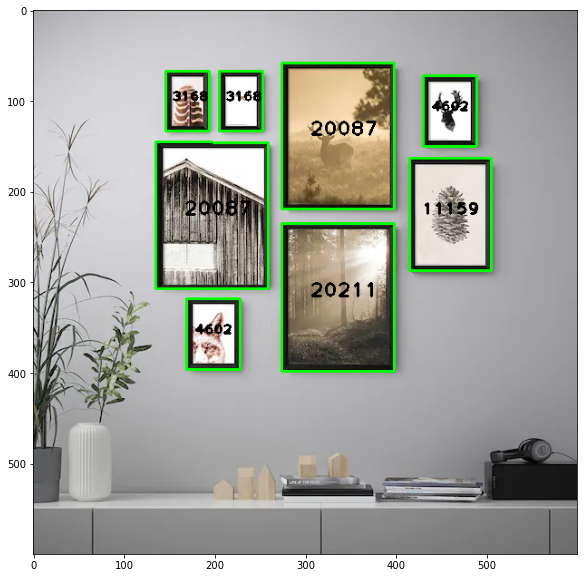

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(out_image, cv.COLOR_BGR2RGB));